In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

Movies

In [2]:
movies_df = pd.read_csv("../data/raw/movies.csv")
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movies_df.info()

print("\nMissing values:\n", movies_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB

Missing values:
 movieId    0
title      0
genres     0
dtype: int64


Ratings

In [4]:
ratings_df = pd.read_csv("../data/raw/ratings.csv",nrows = 500_000)
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.00,964982703
1,1,3,4.00,964981247
2,1,6,4.00,964982224
3,1,47,5.00,964983815
4,1,50,5.00,964982931


In [5]:
ratings_df.info()

print("\nMissing values:\n", ratings_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB

Missing values:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [6]:
print("Statistik Rating:\n")
print(f"Jumlah user: {len(ratings_df['userId'].unique())}")
ratings_df.describe()

Statistik Rating:

Jumlah user: 610


,userId,movieId,rating,timestamp
count,100836.00,100836.00,100836.00,100836.00
mean,326.13,19435.30,3.50,1205946087.37
std,182.62,35530.99,1.04,216261036.00
min,1.00,1.00,0.50,828124615.00
25%,177.00,1199.00,3.00,1019123866.00
50%,325.00,2991.00,3.50,1186086662.00
75%,477.00,8122.00,4.00,1435994144.50
max,610.00,193609.00,5.00,1537799250.00


In [7]:
print("Statistik Movies:\n")
print(f"Jumlah Movie: {len(movies_df['movieId'].unique())}")
movies_df.describe()

Statistik Movies:

Jumlah Movie: 9742


,movieId
count,9742.00
mean,42200.35
std,52160.49
min,1.00
25%,3248.25
50%,7300.00
75%,76232.00
max,193609.00


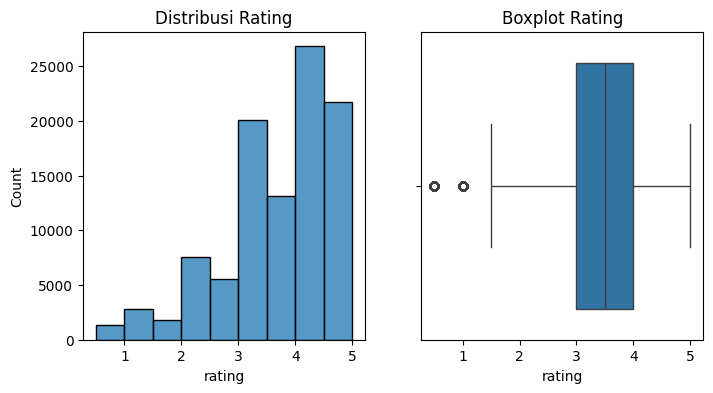

In [8]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(x='rating', data=ratings_df, bins=9)
plt.title("Distribusi Rating")

plt.subplot(1,2,2)
sns.boxplot(x='rating', data=ratings_df)
plt.title("Boxplot Rating")

plt.show()

In [9]:
user_stats = ratings_df.groupby('userId')['rating'].agg(['mean', 'count'])
avg_rating = ratings_df['rating'].mean()
print("Rata-rata rating keseluruhan:", avg_rating)
avg_count_per_user = user_stats['count'].mean()
print("Rata-rata jumlah rating per user:", avg_count_per_user)

Rata-rata rating keseluruhan: 3.501556983616962
Rata-rata jumlah rating per user: 165.30491803278687


In [10]:
movies_df['genres_list'] = movies_df['genres'].str.split('|')
unique_genres = sorted(set(g for genre_list in movies_df['genres_list'] for g in genre_list))
print(unique_genres)
movies_df.head()

['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


,movieId,title,genres,genres_list
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]


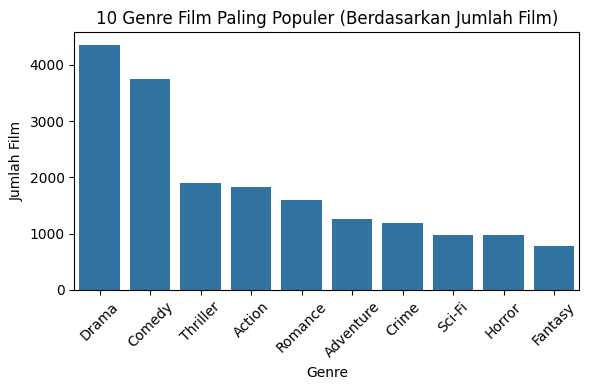

In [11]:
from collections import Counter

all_genres = [g for genre_list in movies_df['genres_list'] for g in genre_list if g != '(no genres listed)']
genre_counts = Counter(all_genres)

top_genres = genre_counts.most_common(10)
top_genres_df = pd.DataFrame(top_genres, columns=['Genre', 'Jumlah Film'])

plt.figure(figsize=(6,4))
sns.barplot(data=top_genres_df, x='Genre', y='Jumlah Film')
plt.title("10 Genre Film Paling Populer (Berdasarkan Jumlah Film)")
plt.xlabel("Genre")
plt.ylabel("Jumlah Film")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Genre paling populer adalah Drama
- Diikuti genre lain seperti Comedy Thriller,dll

In [12]:
merged_df = pd.merge(ratings_df, movies_df, on='movieId', how='left')
merged_df.head()

,userId,movieId,rating,timestamp,title,genres,genres_list
0,1,1,4.00,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,1,3,4.00,964981247,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
2,1,6,4.00,964982224,Heat (1995),Action|Crime|Thriller,"[Action, Crime, Thriller]"
3,1,47,5.00,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,"[Mystery, Thriller]"
4,1,50,5.00,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,"[Crime, Mystery, Thriller]"


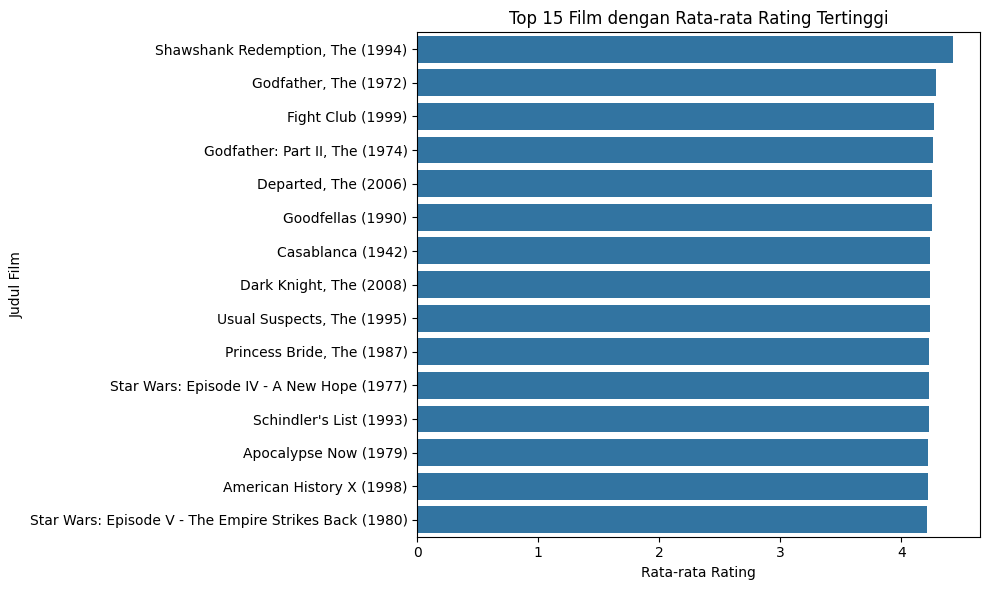

In [13]:
movie_stats = merged_df.groupby(['movieId', 'title', 'genres'])['rating'].agg(['mean', 'count']).reset_index()
movie_stats = movie_stats.sort_values(by=['mean', 'count'], ascending=[False, False])
movie_stats_filtered = movie_stats[movie_stats['count'] >= 100]
top_n = 15
top_movies = movie_stats_filtered.head(top_n)

plt.figure(figsize=(10,6))
sns.barplot(
    y='title',
    x='mean',
    data=top_movies,
    orient='h'
)
plt.xlabel('Rata-rata Rating')
plt.ylabel('Judul Film')
plt.title(f'Top {top_n} Film dengan Rata-rata Rating Tertinggi')
plt.tight_layout()
plt.show()

In [14]:
from scipy.sparse import coo_matrix

num_ratings = merged_df.shape[0]
num_users = merged_df['userId'].nunique()
num_movies = merged_df['movieId'].nunique()

sparsity = 1- (num_ratings/(num_movies*num_users))
print(f"Sparsity = {sparsity*100:.2f}%")
user_ids = merged_df['userId'].astype('category').cat.codes
movie_ids = merged_df['movieId'].astype('category').cat.codes

sparse_ratings = coo_matrix((merged_df['rating'], (user_ids, movie_ids)))

Sparsity = 98.30%


- Dari sparsity, jumlah nilai 0 dalam matrix user-user adalah 99.46%.
- Matrix user-user sangat sparse, ini akan menjadi tantangan dalam collaborative filtering

In [15]:
merged_df['datetime'] = pd.to_datetime(merged_df['timestamp'],unit = 's')
merged_df['year_month'] = merged_df['datetime'].dt.to_period('M')
merged_df.head()

,userId,movieId,rating,timestamp,title,genres,genres_list,datetime,year_month
0,1,1,4.00,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",2000-07-30 18:45:03,2000-07
1,1,3,4.00,964981247,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]",2000-07-30 18:20:47,2000-07
2,1,6,4.00,964982224,Heat (1995),Action|Crime|Thriller,"[Action, Crime, Thriller]",2000-07-30 18:37:04,2000-07
3,1,47,5.00,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,"[Mystery, Thriller]",2000-07-30 19:03:35,2000-07
4,1,50,5.00,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,"[Crime, Mystery, Thriller]",2000-07-30 18:48:51,2000-07


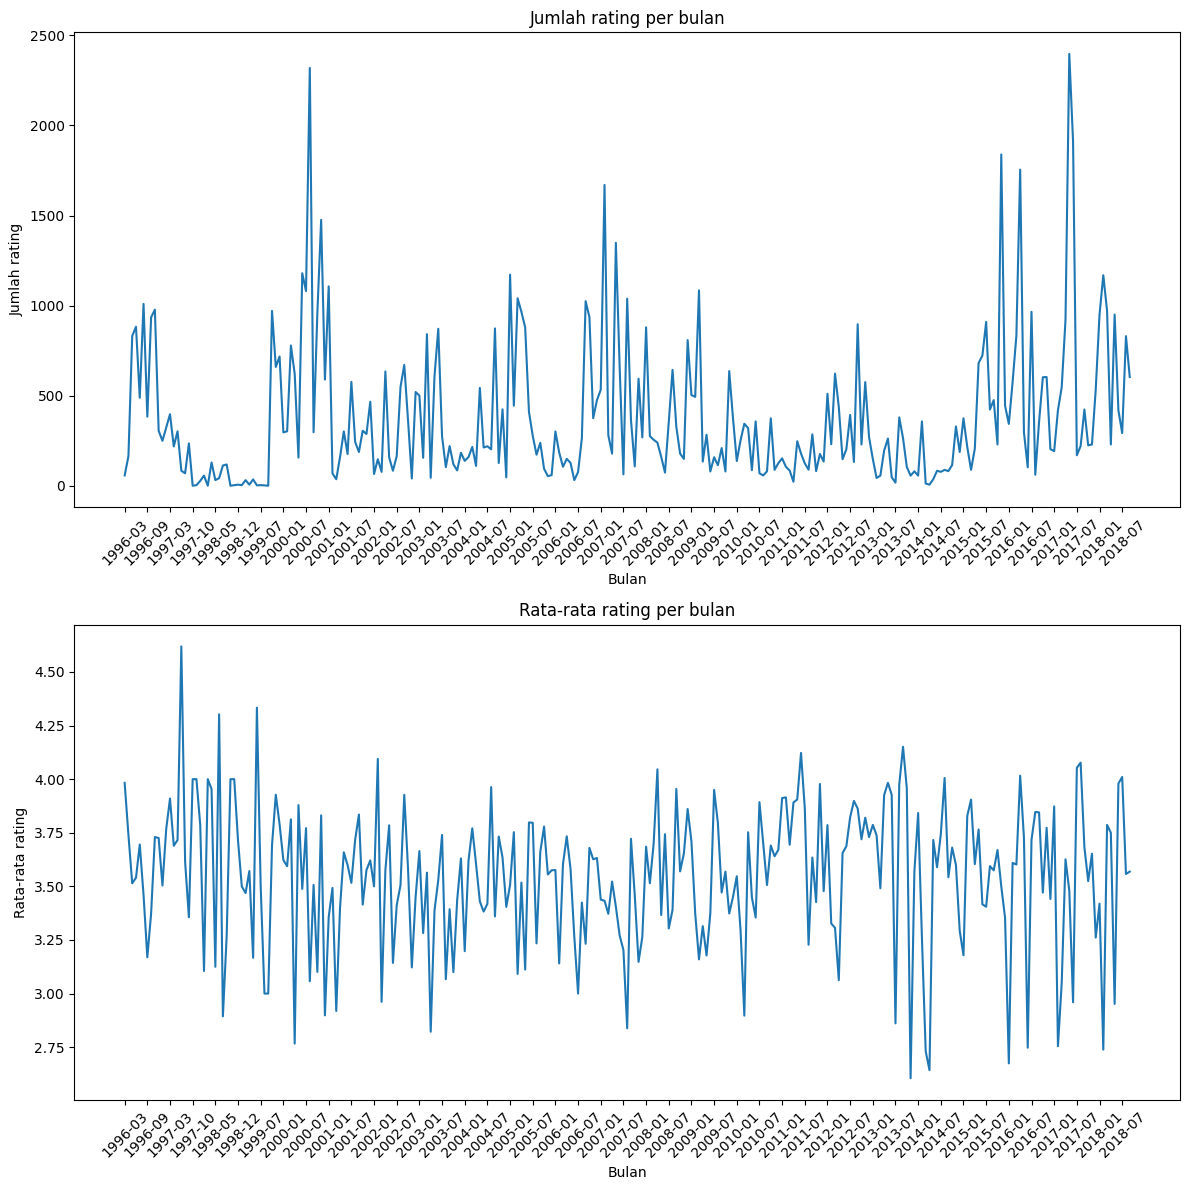

In [16]:
plt.figure(figsize=(12, 12))
plt.subplot(2,1,1)
trend_rating = merged_df.groupby('year_month').size()
trend_rating.index = trend_rating.index.astype(str)
plt.plot(trend_rating)
plt.title("Jumlah rating per bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah rating")
xticks_to_show = trend_rating.index[::6]
plt.xticks(ticks=xticks_to_show, labels=xticks_to_show, rotation=45)

plt.subplot(2,1,2)
mean_rating = merged_df.groupby('year_month')['rating'].mean()
mean_rating.index = mean_rating.index.astype(str)
plt.plot(mean_rating)
plt.title("Rata-rata rating per bulan")
plt.xlabel("Bulan")
plt.ylabel("Rata-rata rating")
xticks_to_show = mean_rating.index[::6]
plt.xticks(ticks=xticks_to_show, labels=xticks_to_show, rotation=45)

plt.tight_layout()
plt.show()

In [17]:
from scipy.sparse.linalg import svds
k = 20
U,sigma,VT = svds(sparse_ratings,k=k) 

In [18]:
U.shape,VT.shape

((610, 20), (20, 9724))

In [19]:
from surprise import Dataset, Reader, KNNBasic

user_user = coo_matrix((merged_df['rating'], (user_ids, movie_ids)))
item_item = coo_matrix((merged_df['rating'], (movie_ids,user_ids)))
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(merged_df[['userId', 'movieId', 'rating']], reader)
trainset = data.build_full_trainset()

Data sudah disiapkan untuk collaborative filtering, matrix factorization dan selanjutnya untuk teknik advance, maka data akan disiapkan saat proses pelatihannya

   * “*Splitting data akan dilakukan pada tahap modeling sesuai kebutuhan task.
     Secara umum, saya mempertimbangkan tiga opsi:*

     * *Random split:* untuk baseline/eksperimen awal.\_
     * *Time-based split:* untuk mereplikasi prediksi dunia nyata, hanya gunakan data sebelum timestamp tertentu untuk train, setelahnya untuk test.\_
     * *Leave-one-out per user:* untuk evaluasi top-N ranking (satu interaksi terbaru per user untuk test, sisanya untuk train).\_
   * *Keputusan split akhir akan diambil sebelum modeling tiap task, dengan argumen sesuai skenario aplikasi yang ingin disimulasikan.*”

In [20]:
df = merged_df[['userId','movieId','rating']]
df.head()

,userId,movieId,rating
0,1,1,4.00
1,1,3,4.00
2,1,6,4.00
3,1,47,5.00
4,1,50,5.00
